In [98]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [99]:
import cv2
import imghdr
import os

In [100]:
data_dir='veggie_heap_training'
test='veggie_heap_testing'

In [101]:
img = cv2.imread(os.path.join('veggie_heap_training','Apatosaur Aphie\'s Apples','image (56).JPG'))

In [102]:
img.shape

(256, 256, 3)

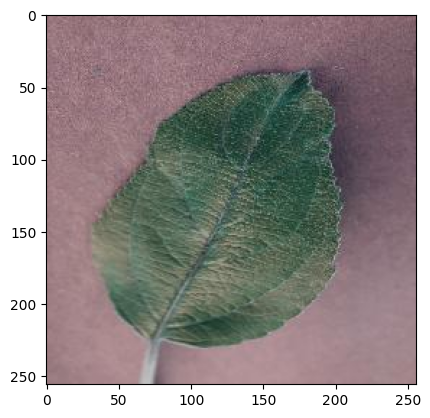

In [103]:
plt.imshow(img)

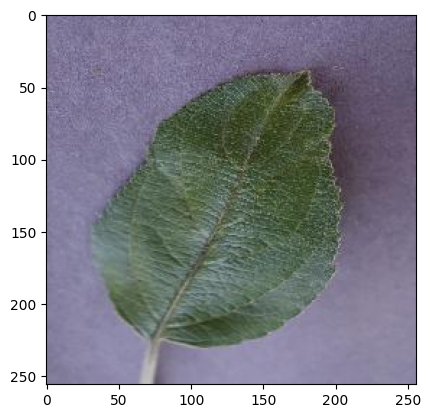

In [104]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [105]:
os.listdir(data_dir)

["Pepteranodon Pep's Peppers",
 "Thyreosaur Tim's Thyme",
 "Corythosaurus Cory's Corn",
 "Potoceratops Pott's Potatoes",
 "Cherizinoasaur Cher's Cherries",
 "Grapthorina Greta's Grapes",
 "Rhaspdodon Ribery's Raspberries",
 "Stribecosaurus Stan's Strawberries",
 "Pachycephalosaurus Perry's Peaches",
 "Bluplocephalus Bob's Blueberries",
 "Apatosaur Aphie's Apples"]

In [106]:
data=tf.keras.utils.image_dataset_from_directory('veggie_heap_training')#,batch_size=137 

Found 8905 files belonging to 11 classes.


In [107]:
data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [108]:
data_iterator=data.as_numpy_iterator()

In [109]:
data_iterator

In [110]:
batch=data_iterator.next()

In [111]:
batch[0].shape

(32, 256, 256, 3)

In [112]:
batch[1]

array([ 1,  4,  4,  6,  5,  9,  1,  1, 10,  3, 10,  3,  1,  2,  2,  2,  2,
        6, 10,  6, 10,  6, 10,  6,  0,  6,  0,  6, 10,  1,  3,  6],
      dtype=int32)

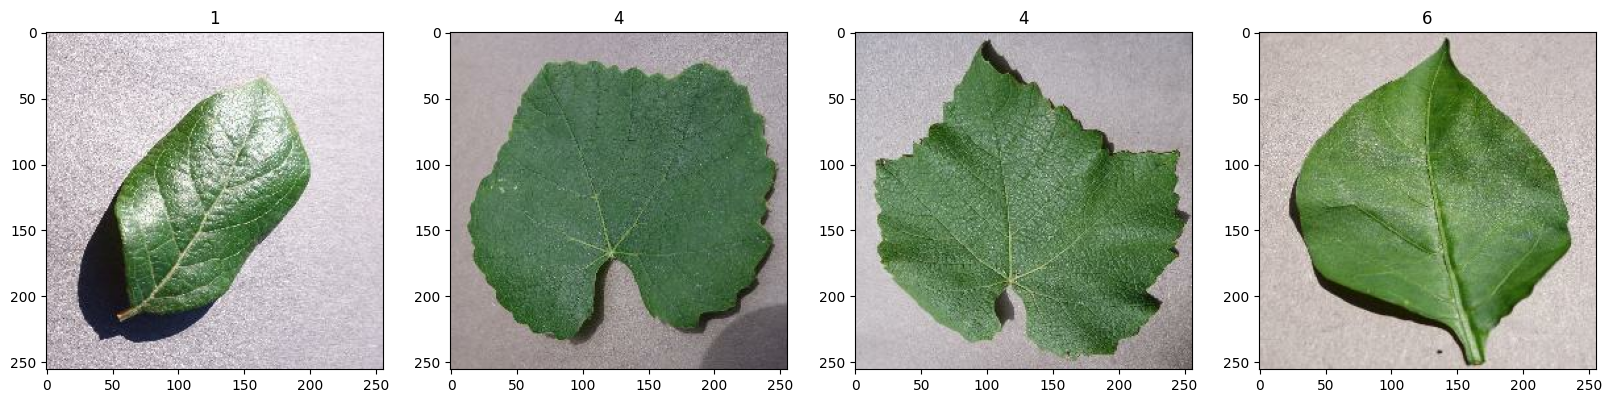

In [113]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [114]:
data=data.map(lambda x,y:(x/255,y))

In [115]:
scaled_iterator = data.as_numpy_iterator()

In [116]:
batch = scaled_iterator.next()

In [117]:
print("Min: ",batch[0].min(),"\nMax: ",batch[0].max())

Min:  0.0 
Max:  1.0


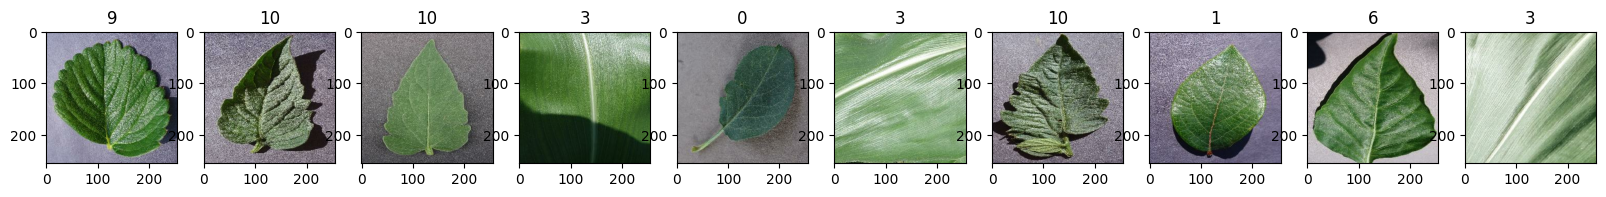

In [118]:
fig,ax=plt.subplots(ncols=10,figsize=(20,20))
for idx,img in enumerate(batch[0][:10]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [119]:
len(data)

279

In [120]:
data_test=tf.keras.utils.image_dataset_from_directory('veggie_heap_testing',batch_size=2211)

Found 2211 files belonging to 11 classes.


In [121]:
len(data_test)

1

In [122]:
train_size = int(len(data)*0.8)
val_size = int(len(data)*0.2)+1
test_size= int(len(data_test))

In [123]:
train_size+val_size

279

In [124]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data_test.take(test_size)

In [125]:
len(test)

1

In [126]:
model=Sequential()

In [127]:
model.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(11,activation='softmax'))


In [128]:
model.compile??

Signature:
model.compile(
    optimizer='rmsprop',
    loss=None,
    metrics=None,
    loss_weights=None,
    weighted_metrics=None,
    run_eagerly=None,
    steps_per_execution=None,
    jit_compile=None,
    pss_evaluation_shards=0,
    **kwargs,
)
Source:   
    @traceback_utils.filter_traceback
    def compile(
        self,
        optimizer="rmsprop",
        loss=None,
        metrics=None,
        loss_weights=None,
        weighted_metrics=None,
        run_eagerly=None,
        steps_per_execution=None,
        jit_compile=None,
        pss_evaluation_shards=0,
        **kwargs,
    ):
        """Configures the model for training.

        Example:

        ```python
        model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
                      loss=tf.keras.losses.BinaryCrossentropy(),
                      metrics=[tf.keras.metrics.BinaryAccuracy(),
                               tf.keras.metrics.FalseNegatives()])
        ```

        Args:
         

In [129]:
model.compile(optimizer='adam',loss=tf.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])

In [130]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 30, 30, 16)       

In [131]:
logdir='logs'

In [132]:
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist = model.fit(train,epochs=10,validation_data=val,callbacks=[tensorboard_callback])

Epoch 1/10
223/223 [==============================] - 36s 159ms/step - loss: 0.6984 - accuracy: 0.7747 - val_loss: 0.3605 - val_accuracy: 0.8756
Epoch 2/10
223/223 [==============================] - 34s 153ms/step - loss: 0.2344 - accuracy: 0.9245 - val_loss: 0.1951 - val_accuracy: 0.9401
Epoch 3/10
223/223 [==============================] - 34s 151ms/step - loss: 0.1214 - accuracy: 0.9588 - val_loss: 0.1584 - val_accuracy: 0.9548
Epoch 4/10
223/223 [==============================] - 34s 150ms/step - loss: 0.0918 - accuracy: 0.9711 - val_loss: 0.1485 - val_accuracy: 0.9548
Epoch 5/10
223/223 [==============================] - 34s 151ms/step - loss: 0.0516 - accuracy: 0.9830 - val_loss: 0.1727 - val_accuracy: 0.9491
Epoch 6/10
223/223 [==============================] - 34s 151ms/step - loss: 0.0509 - accuracy: 0.9815 - val_loss: 0.4769 - val_accuracy: 0.8717
Epoch 7/10
223/223 [==============================] - 34s 152ms/step - loss: 0.0462 - accuracy: 0.9843 - val_loss: 0.1419 - val_ac

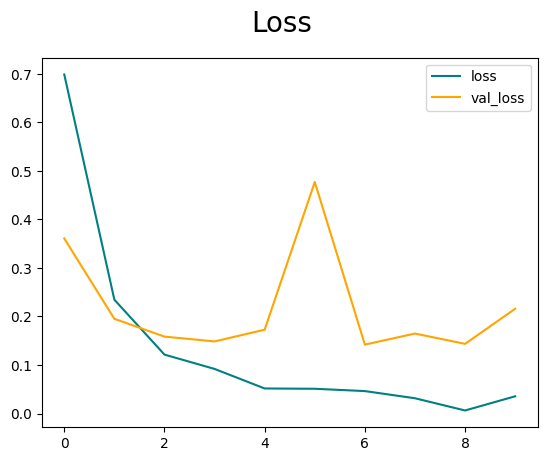

In [133]:
fig = plt.figure()
plt.plot(hist.history['loss'],color='teal',label='loss')
plt.plot(hist.history['val_loss'],color='orange',label='val_loss')
fig.suptitle('Loss',fontsize=20)
plt.legend(loc='upper right')
plt.show()

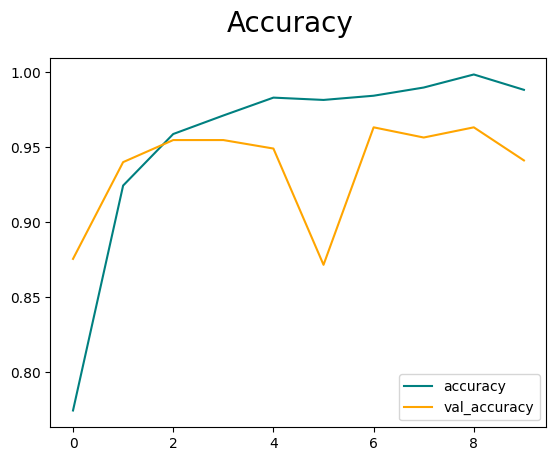

In [134]:
fig = plt.figure()
plt.plot(hist.history['accuracy'],color='teal',label='accuracy')
plt.plot(hist.history['val_accuracy'],color='orange',label='val_accuracy')
fig.suptitle('Accuracy',fontsize=20)
plt.legend(loc='lower right')
plt.show()

In [90]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [91]:
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

In [92]:
for batch in test.as_numpy_iterator():
    X,y = batch
    pred = model.predict(X)
    pre.update_state(y,pred)
    re.update_state(y,pred)
    acc.update_state(y,pred)

70/70 [==============================] - 3s 41ms/step


In [146]:
print("Precision: ",pre.result().numpy(),"\tRecall: ",re.result().numpy(),"\tAccuracy: ",acc.result().numpy())

Precision:  0.9095432 	Recall:  1.0 	Accuracy:  0.9995479


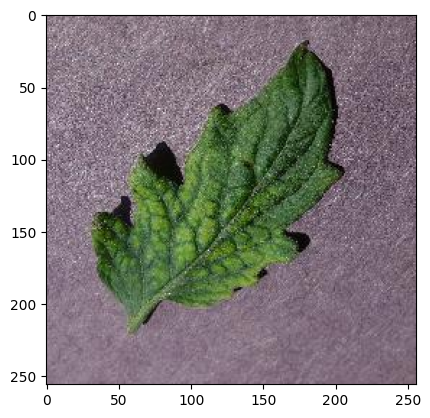

In [154]:
img = cv2.imread('test10.JPG')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

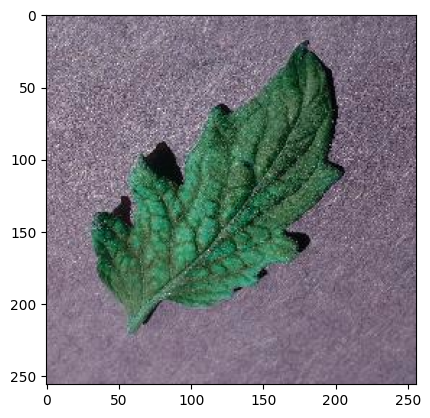

In [162]:
resize = tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [167]:
np.expand_dims(resize,0).shape

(1, 256, 256, 3)

In [158]:
pred = model.predict(np.expand_dims(img/255,0))

1/1 [==============================] - 0s 75ms/step


In [159]:
pred

array([[9.9786061e-01, 2.0656590e-03, 1.6565513e-06, 4.2442281e-09,
        2.0774085e-08, 1.4716821e-06, 5.4861735e-05, 7.1517398e-08,
        1.5306234e-05, 1.5593292e-12, 3.0616630e-07]], dtype=float32)